### DBSCAN  (Density-Based Spatial Clustering of Applications with Noise) 

In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


Silhouette Score cannot be calculated with only one cluster.


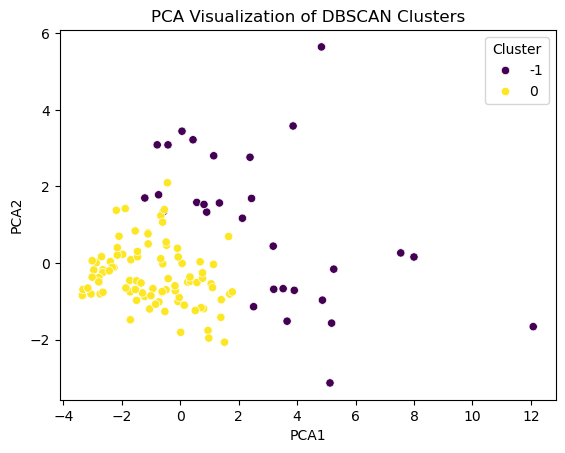

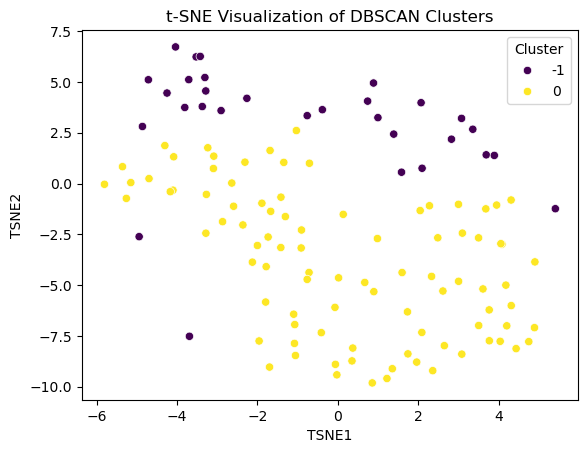

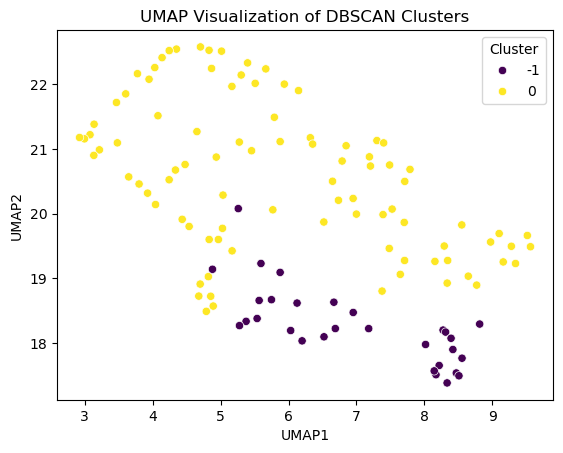

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# Load the dataset
data_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_for_clustering.csv"
df = pd.read_csv(data_path)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df)

# Apply DBSCAN with estimated parameters
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Tune these values as needed
df['Cluster'] = dbscan.fit_predict(X)

# Remove noise points (-1) for silhouette score calculation
valid_clusters = df[df['Cluster'] != -1]
if len(valid_clusters['Cluster'].unique()) > 1:
    sil_score = silhouette_score(valid_clusters.iloc[:, :-1], valid_clusters['Cluster'])
    print(f"Silhouette Score: {sil_score}")
else:
    print("Silhouette Score cannot be calculated with only one cluster.")

# PCA Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df['PCA1'], df['PCA2'] = pca_result[:, 0], pca_result[:, 1]
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title("PCA Visualization of DBSCAN Clusters")
plt.show()

# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X)
df['TSNE1'], df['TSNE2'] = tsne_result[:, 0], tsne_result[:, 1]
sns.scatterplot(data=df, x='TSNE1', y='TSNE2', hue='Cluster', palette='viridis')
plt.title("t-SNE Visualization of DBSCAN Clusters")
plt.show()

# UMAP Visualization
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(X)
df['UMAP1'], df['UMAP2'] = umap_result[:, 0], umap_result[:, 1]
sns.scatterplot(data=df, x='UMAP1', y='UMAP2', hue='Cluster', palette='viridis')
plt.title("UMAP Visualization of DBSCAN Clusters")
plt.show()


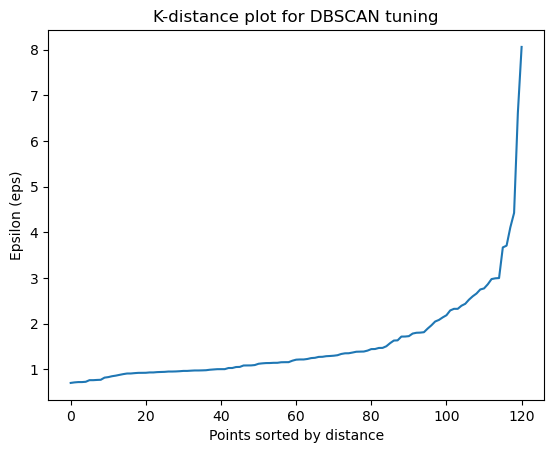

Silhouette Score cannot be calculated with only one cluster.


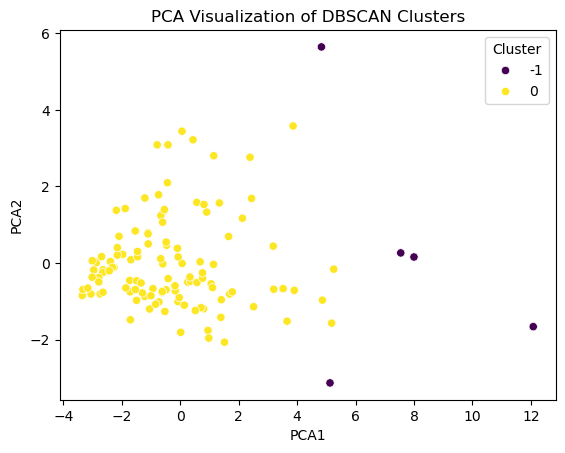

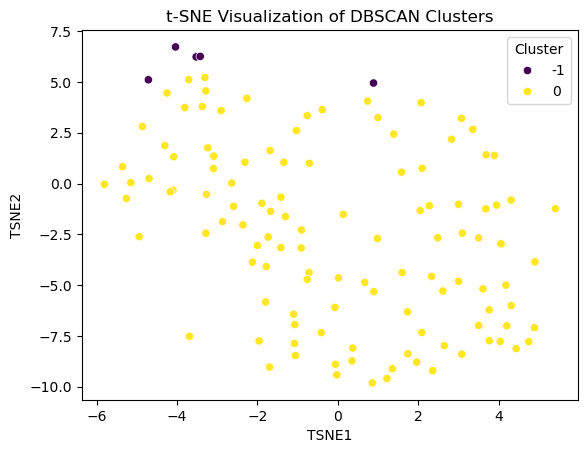

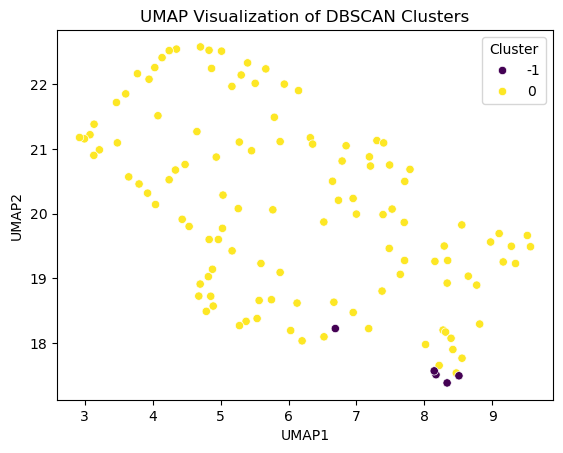

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.neighbors import NearestNeighbors

# Load the dataset
data_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_for_clustering.csv"
df = pd.read_csv(data_path)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df)

# Find optimal eps using k-distance plot
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(X)
distances, indices = neigh.kneighbors(X)

# Sort distances and plot
sorted_distances = np.sort(distances[:, -1])
plt.plot(sorted_distances)
plt.xlabel("Points sorted by distance")
plt.ylabel("Epsilon (eps)")
plt.title("K-distance plot for DBSCAN tuning")
plt.show()

# Choose eps based on the elbow point manually or programmatically (e.g., heuristic: 90th percentile)
eps_optimal = sorted_distances[int(0.90 * len(sorted_distances))]

# Apply DBSCAN with tuned eps
dbscan = DBSCAN(eps=eps_optimal, min_samples=5)  # Adjust min_samples as needed
df['Cluster'] = dbscan.fit_predict(X)

# Remove noise points (-1) for silhouette score calculation
valid_clusters = df[df['Cluster'] != -1]
if len(valid_clusters['Cluster'].unique()) > 1:
    sil_score = silhouette_score(valid_clusters.iloc[:, :-1], valid_clusters['Cluster'])
    print(f"Silhouette Score: {sil_score}")
else:
    print("Silhouette Score cannot be calculated with only one cluster.")

# PCA Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df['PCA1'], df['PCA2'] = pca_result[:, 0], pca_result[:, 1]
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title("PCA Visualization of DBSCAN Clusters")
plt.show()

# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X)
df['TSNE1'], df['TSNE2'] = tsne_result[:, 0], tsne_result[:, 1]
sns.scatterplot(data=df, x='TSNE1', y='TSNE2', hue='Cluster', palette='viridis')
plt.title("t-SNE Visualization of DBSCAN Clusters")
plt.show()

# UMAP Visualization
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(X)
df['UMAP1'], df['UMAP2'] = umap_result[:, 0], umap_result[:, 1]
sns.scatterplot(data=df, x='UMAP1', y='UMAP2', hue='Cluster', palette='viridis')
plt.title("UMAP Visualization of DBSCAN Clusters")
plt.show()


In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def calculate_p_value(X, labels, n_clusters, n_permutations=1000, random_state=42):
    observed_score = silhouette_score(X, labels)
    permuted_scores = []
    np.random.seed(random_state)
    for i in range(n_permutations):
        random_labels = np.random.randint(0, n_clusters, len(X))
        try:
            score = silhouette_score(X, random_labels)
        except Exception:
            score = 0
        permuted_scores.append(score)
    permuted_scores = np.array(permuted_scores)
    p_value = np.mean(permuted_scores >= observed_score)
    return observed_score, p_value

df = pd.read_csv(r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_for_clustering.csv")
if "Cell Number" in df.columns:
    df = df.drop("Cell Number", axis=1)
X = df.values

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_db = dbscan.fit_predict(X)
mask = labels_db != -1
if np.sum(mask) > 0:
    X_db = X[mask]
    labels_db_filtered = labels_db[mask]
    n_clusters_db = len(np.unique(labels_db_filtered))
    obs, p = calculate_p_value(X_db, labels_db_filtered, n_clusters_db)
    print("DBSCAN: Silhouette Score =", obs, "p‑value =", p)
else:
    print("DBSCAN: No clusters found (only noise).")


DBSCAN: No clusters found (only noise).


Completed clustering for eps=0.10 with Silhouette Score: 0.0000 and JS Distance: 0.0000


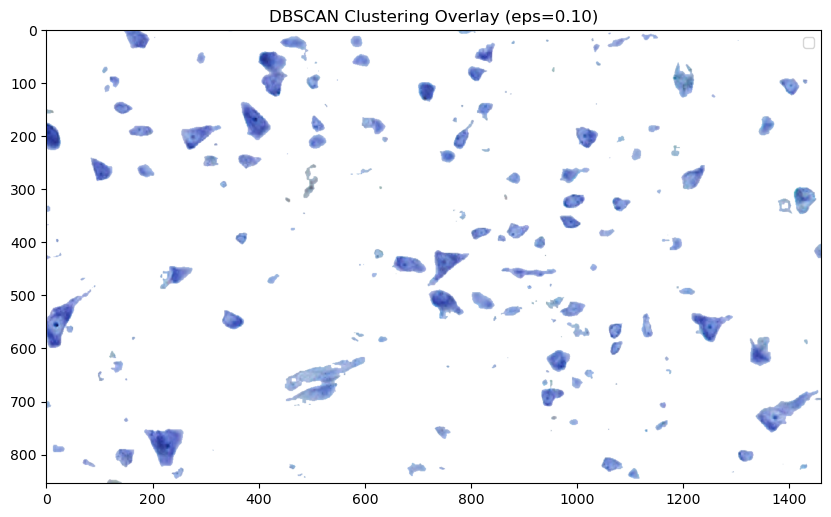

Completed clustering for eps=0.34 with Silhouette Score: 0.0000 and JS Distance: 0.0000


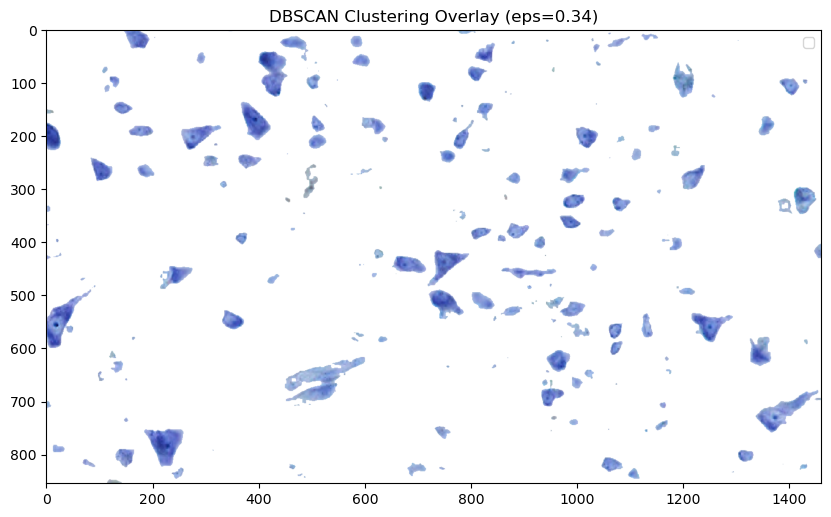

Completed clustering for eps=0.57 with Silhouette Score: 0.0000 and JS Distance: 0.0000


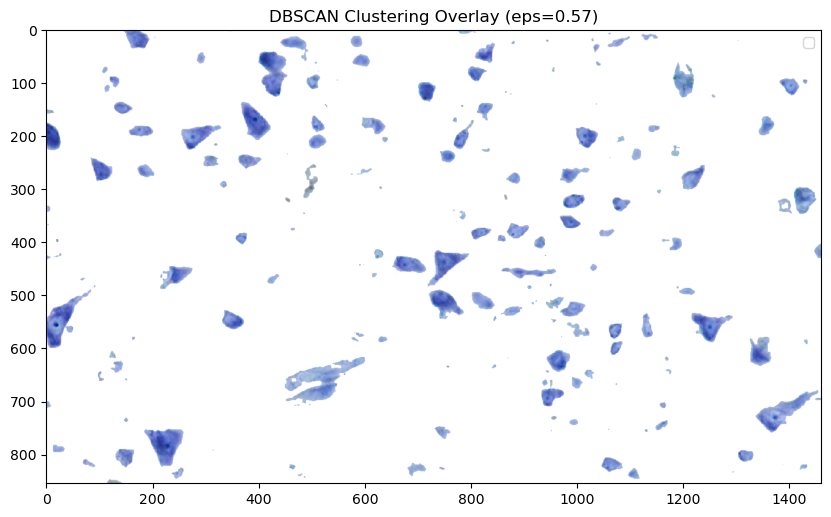

Completed clustering for eps=0.81 with Silhouette Score: 0.0000 and JS Distance: 0.0000


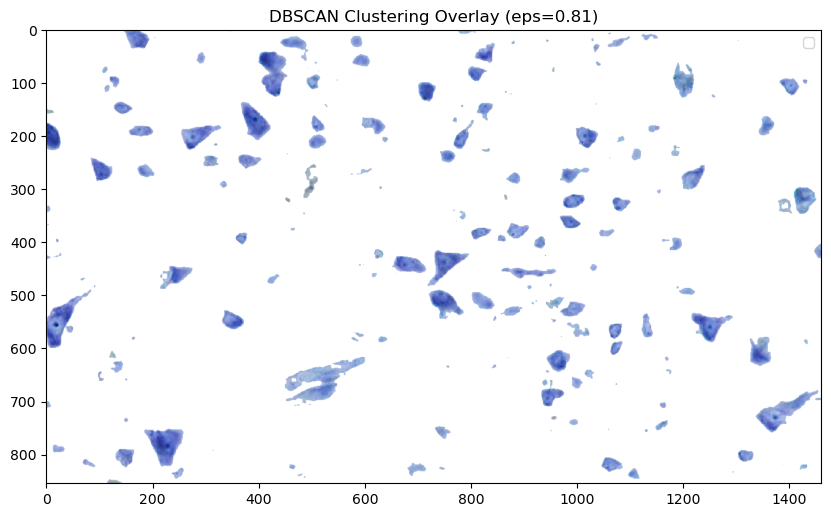

Completed clustering for eps=1.05 with Silhouette Score: 0.0000 and JS Distance: 0.0000


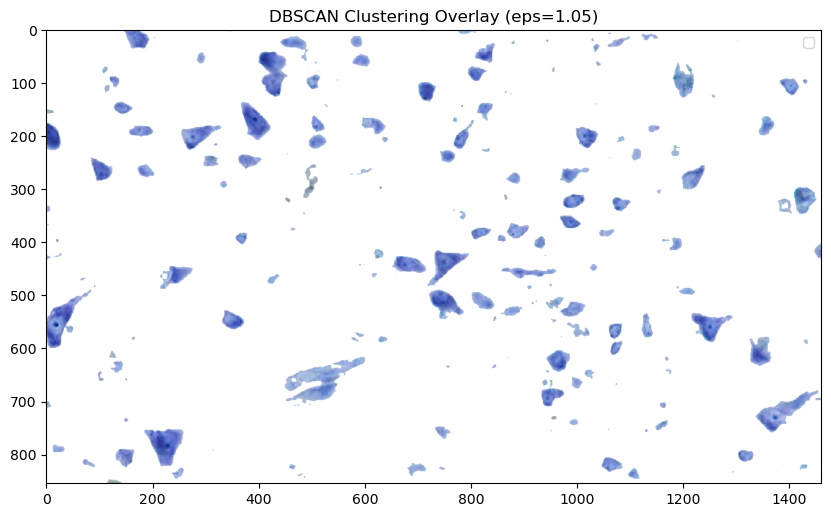

Completed clustering for eps=1.29 with Silhouette Score: 0.0000 and JS Distance: 0.0000


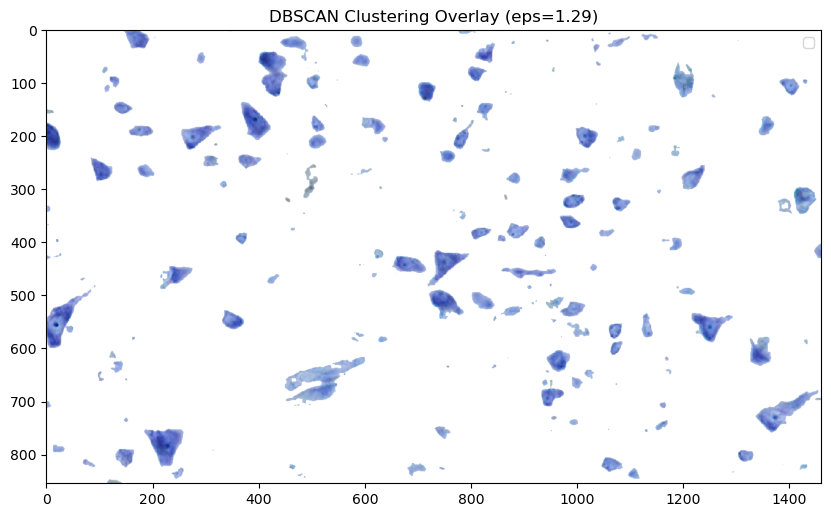

Completed clustering for eps=1.52 with Silhouette Score: 0.0000 and JS Distance: 0.0000


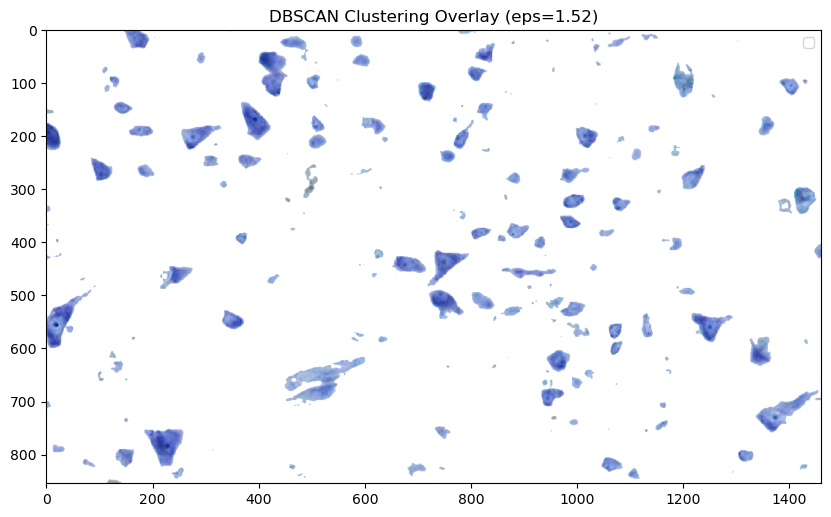

Completed clustering for eps=1.76 with Silhouette Score: 0.0000 and JS Distance: 0.0000


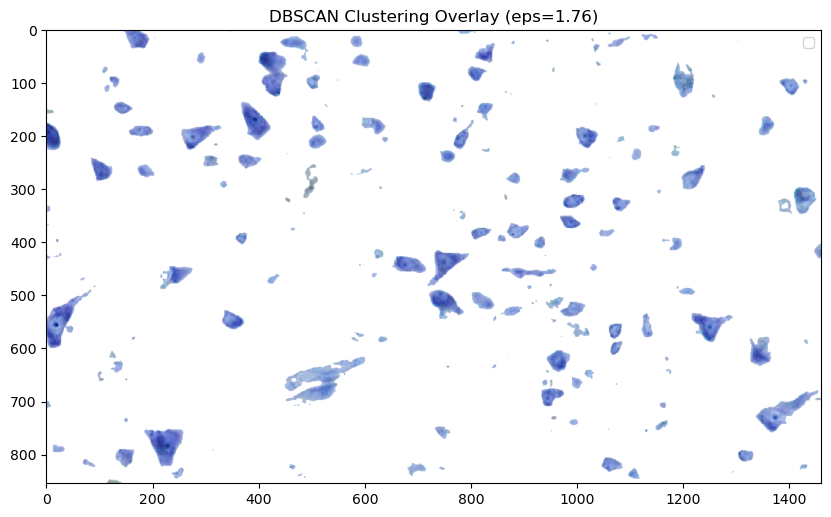

Completed clustering for eps=2.00 with Silhouette Score: 0.0000 and JS Distance: 0.0000


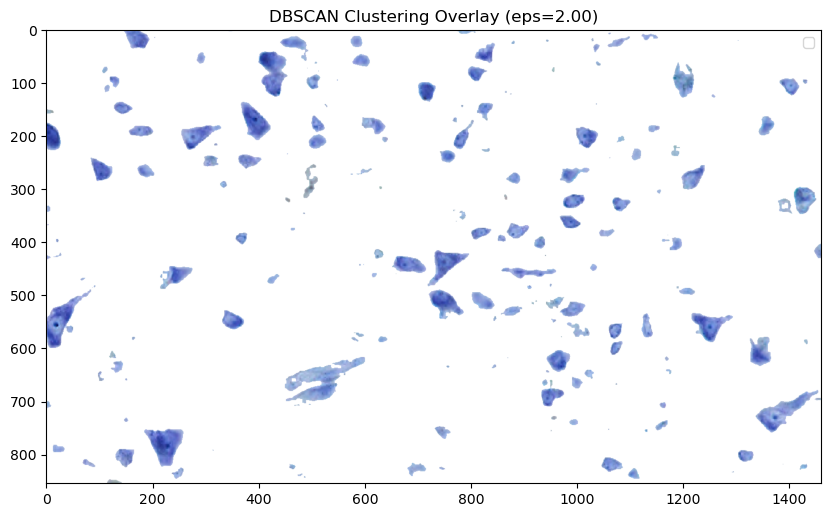

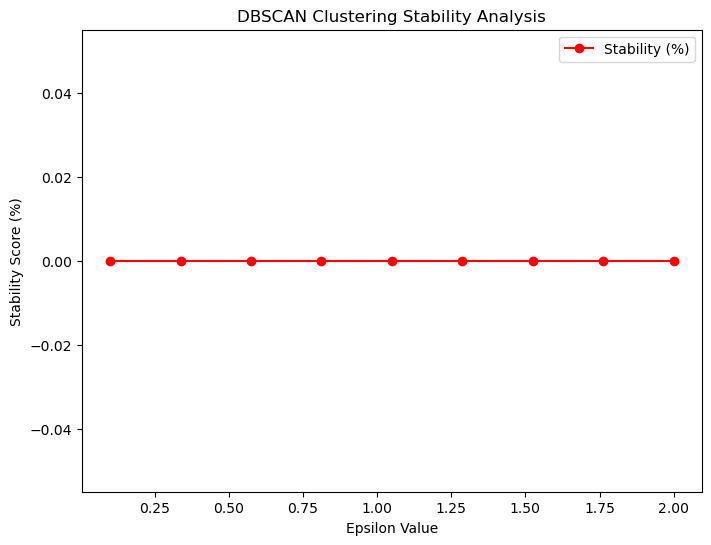

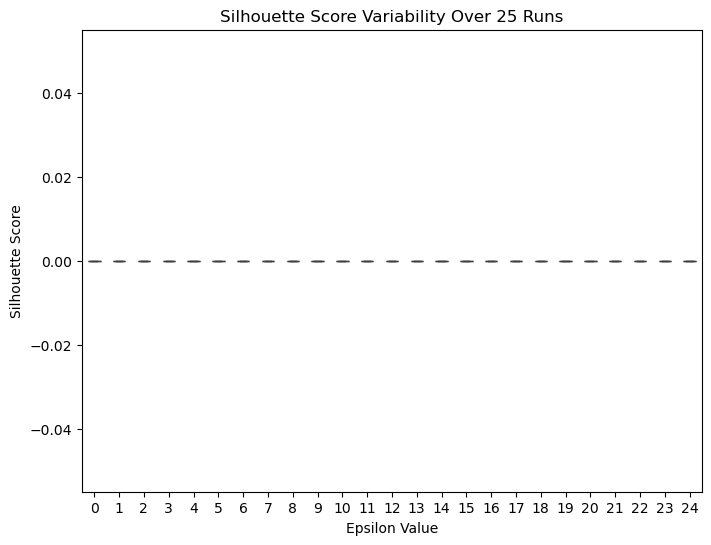

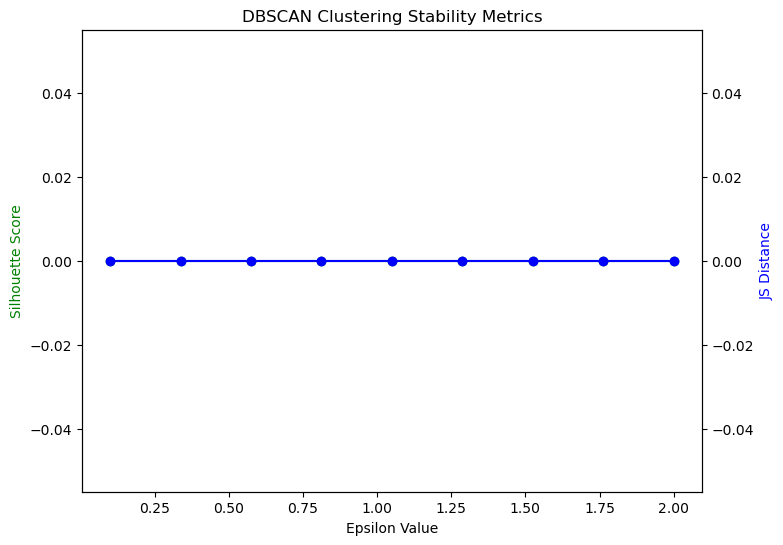

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import jensenshannon
import cv2

# Load Data
feature_csv_path = "data_cell_for_clustering.csv"
coordinate_csv_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\moved_files\data_cell_with_centroids.csv" 
image_path = "restored_white_background_debug-Copy1.png"

df_features = pd.read_csv(feature_csv_path)
df_coordinates = pd.read_csv(coordinate_csv_path)

df = df_coordinates.merge(df_features, on="Cell Number")

# Apply feature weights
weights = {"Solidity": 3, "Circularity": 3, "Local Homogeneity": 3, "Aspect Ratio": 3}
for feature, weight in weights.items():
    if feature in df_features.columns:
        df_features[feature] *= weight

X = df_features.drop(columns=["Cell Number"])

# Set DBSCAN parameters
eps_values = np.linspace(0.1, 2.0, 9)  # 9 values from 0.1 to 2.0
min_samples = 5
silhouette_scores = []
js_distances = []
stability_scores = []

# Load Image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_height, img_width, _ = image.shape

for eps_value in eps_values:
    silhouette_runs = []
    js_runs = []
    
    for _ in range(25):
        model = DBSCAN(eps=eps_value, min_samples=min_samples)
        cluster_labels = model.fit_predict(X)
        unique_clusters = np.unique(cluster_labels[cluster_labels >= 0])  # Ignore noise (-1)
        
        if len(unique_clusters) > 1:
            sil_score = silhouette_score(X, cluster_labels[cluster_labels >= 0])
            silhouette_runs.append(sil_score)
            
            js_score = jensenshannon(
                np.bincount(cluster_labels[cluster_labels >= 0], minlength=len(unique_clusters)),
                np.ones(len(unique_clusters)) / len(unique_clusters)
            )
            js_runs.append(js_score)
        else:
            silhouette_runs.append(0)
            js_runs.append(0)
    
    mean_silhouette = np.mean(silhouette_runs)
    silhouette_scores.append(mean_silhouette)
    stability_scores.append(mean_silhouette * 100)
    mean_js_distance = np.mean(js_runs)
    js_distances.append(mean_js_distance)
    
    print(f"Completed clustering for eps={eps_value:.2f} with Silhouette Score: {mean_silhouette:.4f} and JS Distance: {mean_js_distance:.4f}")
    
    # Plot overlay
    plt.figure(figsize=(10, 10))
    plt.imshow(image, extent=[0, img_width, img_height, 0])
    
    colors = sns.color_palette("tab10", len(unique_clusters))
    for cluster, color in zip(unique_clusters, colors):
        cluster_points = df[cluster_labels == cluster]
        plt.scatter(cluster_points["X Centroid"], cluster_points["Y Centroid"], color=color, label=f"Cluster {cluster}", edgecolors='k', s=60, alpha=0.8)
    
    plt.legend()
    plt.xlim(0, img_width)
    plt.ylim(img_height, 0)
    plt.title(f"DBSCAN Clustering Overlay (eps={eps_value:.2f})")
    plt.savefig(f"dbscan_cluster_eps{eps_value:.2f}.png")
    plt.show()

# Plot Stability Percentage
plt.figure(figsize=(8, 6))
plt.plot(eps_values, stability_scores, 'ro-', label="Stability (%)")
plt.xlabel("Epsilon Value")
plt.ylabel("Stability Score (%)")
plt.title("DBSCAN Clustering Stability Analysis")
plt.legend()
plt.show()

# Silhouette Score Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=[silhouette_scores for _ in range(25)], width=0.5)
plt.xlabel("Epsilon Value")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Variability Over 25 Runs")
plt.show()

# Silhouette and JS Distance Scores
fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()
ax1.plot(eps_values, silhouette_scores, 'go-', label="Silhouette Score")
ax2.plot(eps_values, js_distances, 'bo-', label="JS Distance")
ax1.set_xlabel("Epsilon Value")
ax1.set_ylabel("Silhouette Score", color='g')
ax2.set_ylabel("JS Distance", color='b')
plt.title("DBSCAN Clustering Stability Metrics")
plt.show()
